In [72]:
import numpy as np
import pandas as pd

In [73]:
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [74]:
from imblearn.over_sampling import BorderlineSMOTE

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [76]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPool1D, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam

In [77]:
from IPython.display import display, HTML

In [78]:
url = r'C:\Users\Dylan\Desktop\Datasets\creditcard.csv'
df = pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [80]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<AxesSubplot:>

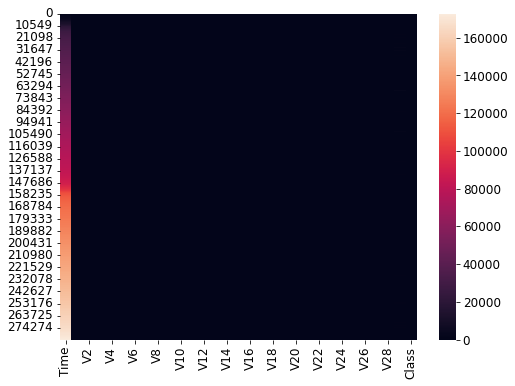

In [81]:
sns.heatmap(df)

In [82]:
df.shape

(284807, 31)

In [83]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

0    284315
1       492
Name: Class, dtype: int64

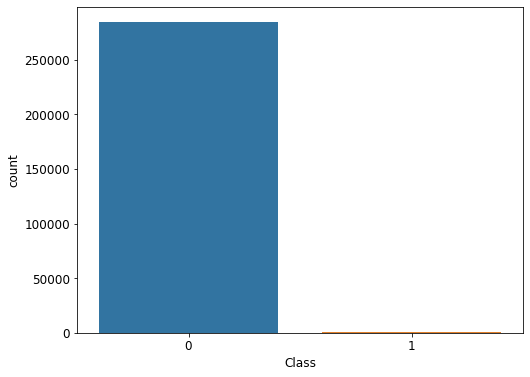

In [84]:
sns.countplot(x=df['Class'])
df['Class'].value_counts()

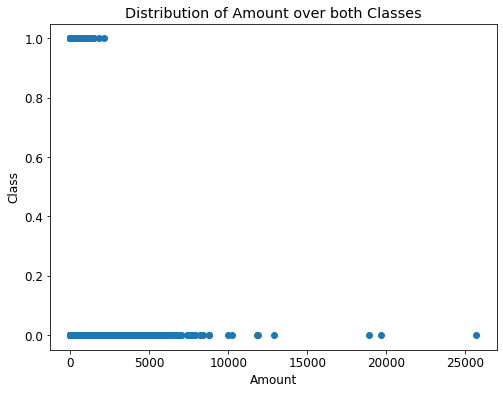

In [85]:
# Adjusting figure size and font size 
plt.rcParams['figure.figsize'] = '8,6'
font = {'size':12}
plt.rc('font', **font)

#Adding titles to the plots and axes 
plt.title('Distribution of Amount over both Classes')
plt.xlabel('Amount')
plt.ylabel('Class')

# Plotting the Amount vs Class columns
plt.scatter(df['Amount'],df['Class'])

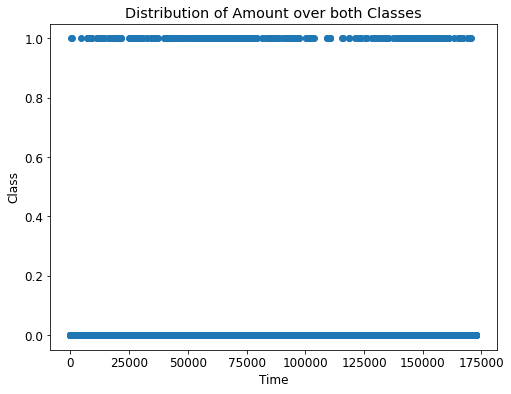

In [86]:
# Adjusting figure size and font size 
plt.rcParams['figure.figsize'] = '8,6'
font = {'size':12}
plt.rc('font', **font)

#Adding titles to the plots and axes 
plt.title('Distribution of Amount over both Classes')
plt.xlabel('Time')
plt.ylabel('Class')

# Plotting the Amount vs Class columns
plt.scatter(df['Time'],df['Class'])

<AxesSubplot:>

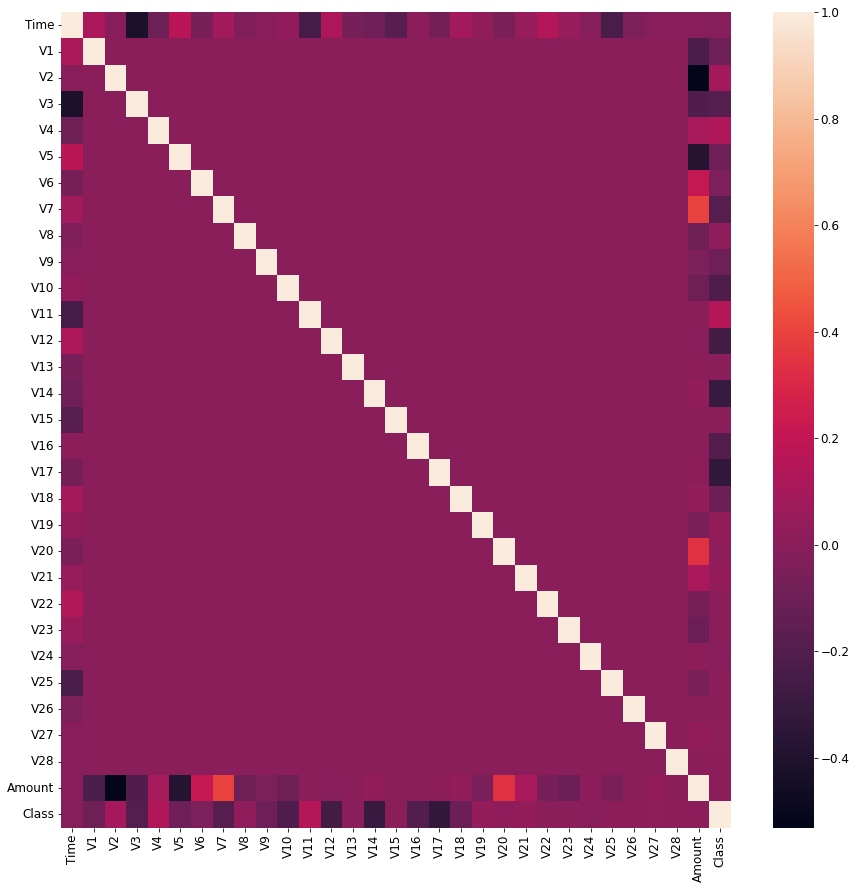

In [87]:
fig = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), vmax=1)

In [88]:
# This function is serving as the ROC Curve Graph
# This will be needed for the evaluation of the graphs
# The function will take the X_test and y_test as parameters
# For the Evalution Graphs I chose to opt for Plotly designs
# Plotly is a lot cleaner and more professional to look at for evaluation metrics making it ideal for demos and presentations

def ROC_Curve_Graph(X_test,y_test,model):
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="Prediction, auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.legend(loc=4)
    plt.show()

In [89]:
X = df.drop(['Class','Time'],axis=1).values
y = df['Class'].values

In [90]:
print(X)

[[-1.35980713e+00 -7.27811733e-02  2.53634674e+00 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 1.19185711e+00  2.66150712e-01  1.66480113e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [-1.35835406e+00 -1.34016307e+00  1.77320934e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.91956501e+00 -3.01253846e-01 -3.24963981e+00 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [-2.40440050e-01  5.30482513e-01  7.02510230e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [-5.33412522e-01 -1.89733337e-01  7.03337367e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]


In [91]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[-0.69424232 -0.04407492  1.6727735  ...  0.33089162 -0.06378115
   0.24496426]
 [ 0.60849633  0.16117592  0.1097971  ... -0.02225568  0.04460752
  -0.34247454]
 [-0.69350046 -0.81157783  1.16946849 ... -0.13713686 -0.18102083
   1.16068593]
 ...
 [ 0.98002374 -0.18243372 -2.14320514 ...  0.01103672 -0.0804672
  -0.0818393 ]
 [-0.12275539  0.32125034  0.46332013 ...  0.26960398  0.31668678
  -0.31324853]
 [-0.27233093 -0.11489898  0.46386564 ... -0.00598394  0.04134999
   0.51435531]]


In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
    )

In [93]:
borderlineSMOTE = BorderlineSMOTE(k_neighbors= 10, random_state=42)
X_train, y_train = borderlineSMOTE.fit_resample(X_train,y_train)

<AxesSubplot:xlabel='Class', ylabel='count'>

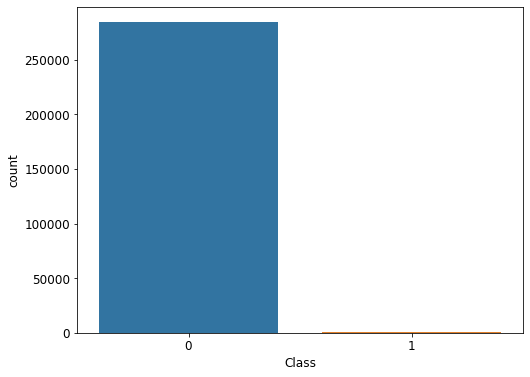

In [94]:
sns.countplot(x=df['Class'])

<AxesSubplot:ylabel='count'>

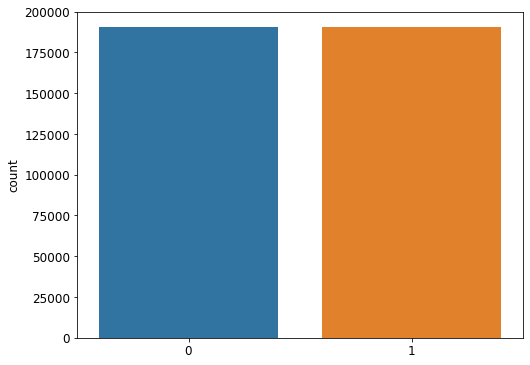

In [95]:
sns.countplot(x=y_train)

----------------------------------------------------------------
Accuracy Training Score:  0.9866703066511967
Accuracy Test Score:  0.9883707321225276
The Accuracy of the model is :  98.83707321225276 %
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     93838
           1       0.11      0.88      0.19       149

    accuracy                           0.99     93987
   macro avg       0.55      0.93      0.59     93987
weighted avg       1.00      0.99      0.99     93987



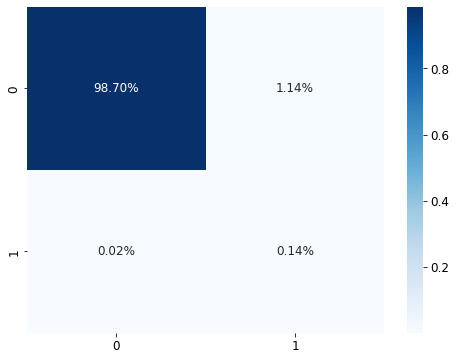

In [96]:
# Logistic Regression 

logReg = LogisticRegression()
logReg.fit(X_train,y_train)

prediction = logReg.predict(X_test)

# Getting and printing model scores
cm = confusion_matrix(y_test,prediction)
sns.heatmap(cm/np.sum(cm), annot= True, fmt='.2%', cmap='Blues')
training_score = logReg.score(X_train,y_train)
test_score = logReg.score(X_test,y_test)
display(HTML("<h1>Logistic Regression</h1>"))
print('----------------------------------------------------------------')
print('Accuracy Training Score: ', training_score)
print('Accuracy Test Score: ', test_score)
print("The Accuracy of the model is : ", accuracy_score(y_test, prediction)*100, "%")
print('----------------------------------------------------------------')

# Look at classification report to evaluate the model
print(classification_report(y_test,prediction))

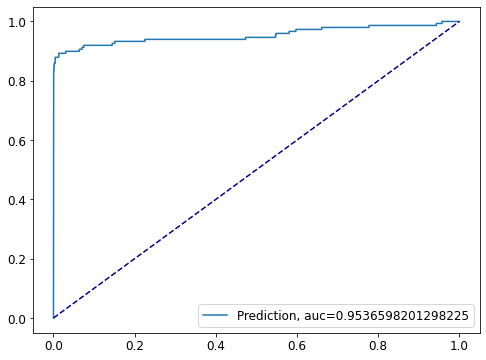

In [97]:
ROC_Curve_Graph(X_test, y_test, logReg)

----------------------------------------------------------------
Accuracy Training Score:  0.9999921250334686
Accuracy Test Score:  0.9995531296881484
The Accuracy of the model is :  99.95531296881484 %
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.87      0.84      0.86       149

    accuracy                           1.00     93987
   macro avg       0.94      0.92      0.93     93987
weighted avg       1.00      1.00      1.00     93987



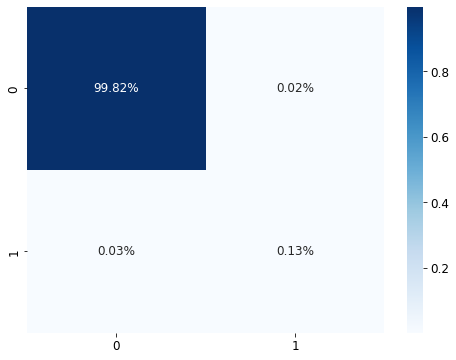

In [98]:
# Random Forest 
rf = RandomForestClassifier(n_estimators= 15, random_state=42)
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)

# Getting and printing model scores
cm = confusion_matrix(y_test,prediction)
sns.heatmap(cm/np.sum(cm), annot= True, fmt='.2%', cmap='Blues')
training_score = rf.score(X_train,y_train)
test_score = rf.score(X_test,y_test)
display(HTML("<h1>Random Forest</h1>"))
print('----------------------------------------------------------------')
print('Accuracy Training Score: ', training_score)
print('Accuracy Test Score: ', test_score)
print("The Accuracy of the model is : ", accuracy_score(y_test, prediction)*100, "%")
print('----------------------------------------------------------------')

# Look at classification report to evaluate the model
print(classification_report(y_test,prediction))

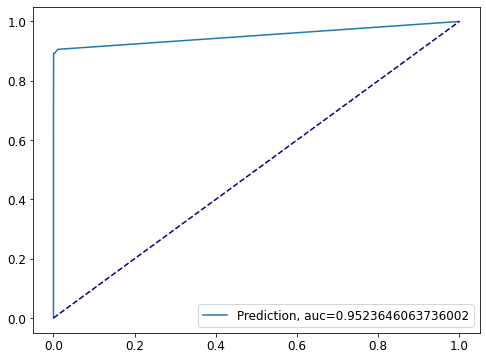

In [99]:
ROC_Curve_Graph(X_test, y_test, rf)

In [100]:
nn = Sequential()

nn.add(Dense(64,input_dim=29,activation='relu'))
nn.add(Dense(32,activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(16,activation='relu'))
nn.add(Dropout(0.15))
nn.add(Dense(1,activation='sigmoid'))
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                1920      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-traina

In [101]:
opt = Adam(learning_rate=1e-4, decay=1e-6)
nn.compile(loss='binary_crossentropy', optimizer=opt,metrics=['Precision','Recall', 'accuracy'])
history = nn.fit(X_train, y_train, epochs = 5,\
                    validation_data = (X_test, y_test))

Epoch 1/5
11905/11905 [==============================] - 23s 2ms/step - loss: 0.0697 - precision: 0.9675 - recall: 0.9841 - accuracy: 0.9755 - val_loss: 0.0202 - val_precision: 0.2623 - val_recall: 0.8591 - val_accuracy: 0.9959
Epoch 2/5
11905/11905 [==============================] - 23s 2ms/step - loss: 0.0139 - precision: 0.9967 - recall: 0.9981 - accuracy: 0.9974 - val_loss: 0.0134 - val_precision: 0.4169 - val_recall: 0.8591 - val_accuracy: 0.9979
Epoch 3/5
11905/11905 [==============================] - 23s 2ms/step - loss: 0.0083 - precision: 0.9982 - recall: 0.9995 - accuracy: 0.9989 - val_loss: 0.0112 - val_precision: 0.4942 - val_recall: 0.8591 - val_accuracy: 0.9984
Epoch 4/5
11905/11905 [==============================] - 23s 2ms/step - loss: 0.0064 - precision: 0.9987 - recall: 0.9996 - accuracy: 0.9992 - val_loss: 0.0098 - val_precision: 0.5811 - val_recall: 0.8658 - val_accuracy: 0.9988
Epoch 5/5
11905/11905 [==============================] - 23s 2ms/step - loss: 0.0054 - p

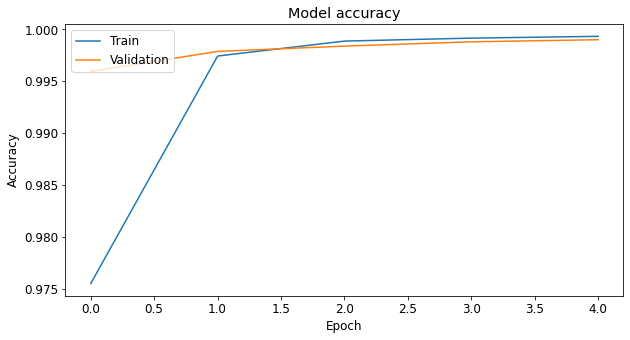

In [102]:
fig, axl = plt.subplots(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

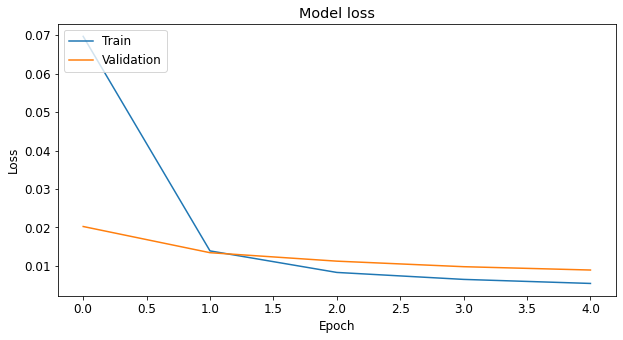

In [103]:
fig, axl = plt.subplots(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

<AxesSubplot:>

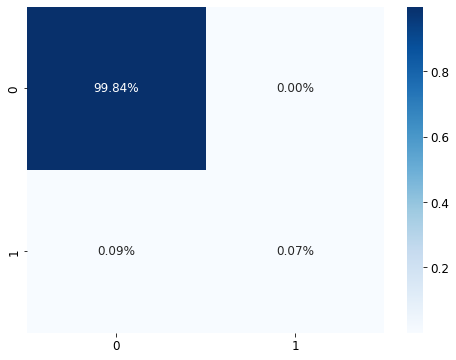

In [104]:
prediction = nn.predict(X_test)
cm = tf.math.confusion_matrix(y_test,prediction)
sns.heatmap(cm/np.sum(cm), annot= True, fmt='.2%', cmap='Blues')